In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(784,))

In [4]:
# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

In [5]:
# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

In [6]:
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoded)

In [9]:
# 可视化该自编码器
from keras.utils import plot_model
plot_model(autoencoder, show_shapes=True, to_file='model.png')

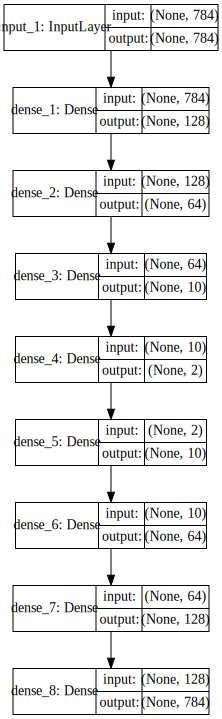

In [12]:
# 或在ipython notebook中显示
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
# construct the encoder model for plotting
encoder = Model(inputs=input_img, outputs=encoder_output)

In [10]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0692
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0561
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0518
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0489
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0470
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0455
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0442
Epoch 8/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0433
Epoch 9/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0426
Epoch 10/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0422
Epoch 11/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0417
Epoch 12/20
60000/60000 [===========================

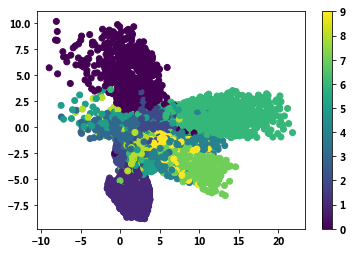

In [12]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()